# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | praia da vitoria
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | acapulco de juarez
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | nishinoomote
Processing Record 9 of Set 1 | darwin
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | dumas
Processing Record 15 of Set 1 | al kharijah
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | meadow lakes
Processing Record 20 of Set 1 | dalandzadgad
Processing Record 21 of Set 1 | masku
Processing Record 22 of Set 1 | const

Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | la rinconada
Processing Record 42 of Set 4 | wakkanai
Processing Record 43 of Set 4 | hammerfest
Processing Record 44 of Set 4 | port saint john's
Processing Record 45 of Set 4 | iskateley
Processing Record 46 of Set 4 | ormara
Processing Record 47 of Set 4 | xai-xai
Processing Record 48 of Set 4 | timbuktu
Processing Record 49 of Set 4 | kozani
Processing Record 0 of Set 5 | amahai
Processing Record 1 of Set 5 | faya-largeau
Processing Record 2 of Set 5 | sambava
Processing Record 3 of Set 5 | abalak
Processing Record 4 of Set 5 | forquilha
Processing Record 5 of Set 5 | sinabang
Processing Record 6 of Set 5 | cruz grande
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | malaga
Processing Record 9 of Set 5 | navolato
Processing Record 10 of Set 5 | corner brook
Processing Record 11 of Set 5 | sinop
Processing Record 12 of Set 5 | rumbek
Processing Record 13 of Set 5 | sarangani
Processing R

Processing Record 28 of Set 8 | korsakov
Processing Record 29 of Set 8 | bonthe
Processing Record 30 of Set 8 | ola
Processing Record 31 of Set 8 | zhezqazghan
Processing Record 32 of Set 8 | tofol
Processing Record 33 of Set 8 | myitkyina
Processing Record 34 of Set 8 | kidal
Processing Record 35 of Set 8 | longboat key
Processing Record 36 of Set 8 | ishigaki
Processing Record 37 of Set 8 | letlhakane
Processing Record 38 of Set 8 | madalena
Processing Record 39 of Set 8 | katsuren-haebaru
Processing Record 40 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 8 | belyy yar
Processing Record 42 of Set 8 | dunedin
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | rampur
Processing Record 45 of Set 8 | alto barinas
Processing Record 46 of Set 8 | siocon
Processing Record 47 of Set 8 | dazhou
Processing Record 48 of Set 8 | ashkasham
Processing Record 49 of Set 8 | naranjal
Processing Record 0 of Set 9 | happy valley-goose bay
Processing 

City not found. Skipping...
Processing Record 11 of Set 12 | jinka
Processing Record 12 of Set 12 | nogliki
Processing Record 13 of Set 12 | kita
Processing Record 14 of Set 12 | las heras
Processing Record 15 of Set 12 | conceicao do araguaia
Processing Record 16 of Set 12 | enriquillo
Processing Record 17 of Set 12 | okha
Processing Record 18 of Set 12 | palikir - national government center
Processing Record 19 of Set 12 | ronne
Processing Record 20 of Set 12 | yaren
Processing Record 21 of Set 12 | keetmanshoop
Processing Record 22 of Set 12 | miquelon
Processing Record 23 of Set 12 | obigarm
Processing Record 24 of Set 12 | sisimiut
Processing Record 25 of Set 12 | asamankese
Processing Record 26 of Set 12 | kismayo
Processing Record 27 of Set 12 | igarka
Processing Record 28 of Set 12 | bamako
Processing Record 29 of Set 12 | okhotsk
Processing Record 30 of Set 12 | t'ongch'on-up
Processing Record 31 of Set 12 | jos
Processing Record 32 of Set 12 | lagunas
Processing Record 33 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,274.05,95,66,3.33,RU,1684907253
1,chonchi,-42.6128,-73.8092,281.71,85,87,6.41,CL,1684907254
2,port elizabeth,-33.9180,25.5701,287.21,69,0,0.51,ZA,1684907255
3,praia da vitoria,38.7333,-27.0667,290.29,82,40,4.53,PT,1684907256
4,puerto ayora,-0.7393,-90.3518,297.90,95,100,3.07,EC,1684907256


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,274.05,95,66,3.33,RU,1684907253
1,chonchi,-42.6128,-73.8092,281.71,85,87,6.41,CL,1684907254
2,port elizabeth,-33.9180,25.5701,287.21,69,0,0.51,ZA,1684907255
3,praia da vitoria,38.7333,-27.0667,290.29,82,40,4.53,PT,1684907256
4,puerto ayora,-0.7393,-90.3518,297.90,95,100,3.07,EC,1684907256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

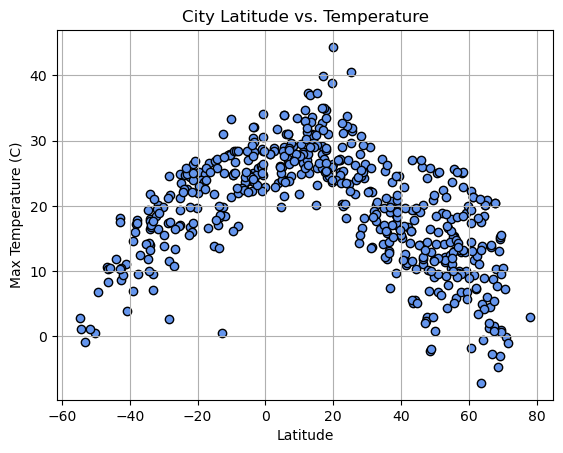

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'] - 273.15, color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

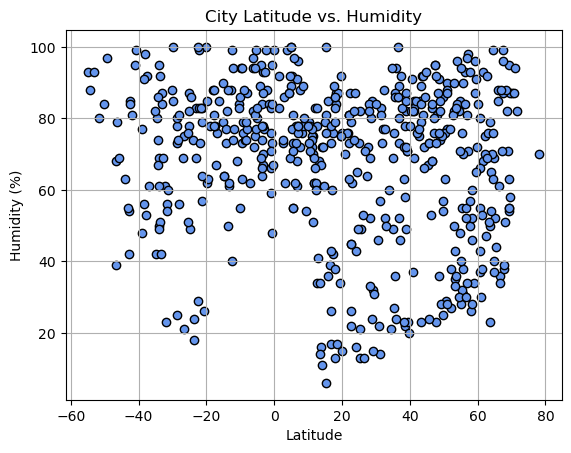

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

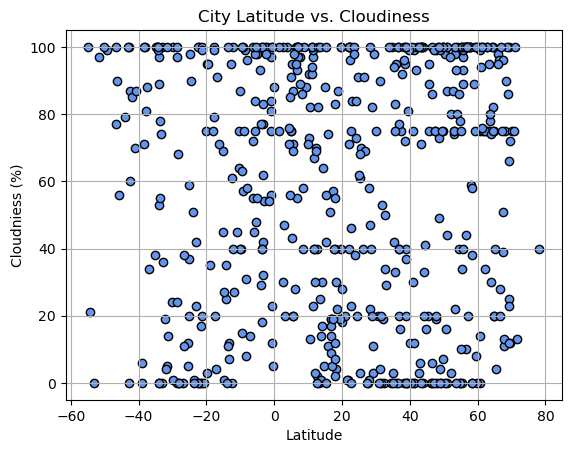

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudniess (%)')
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

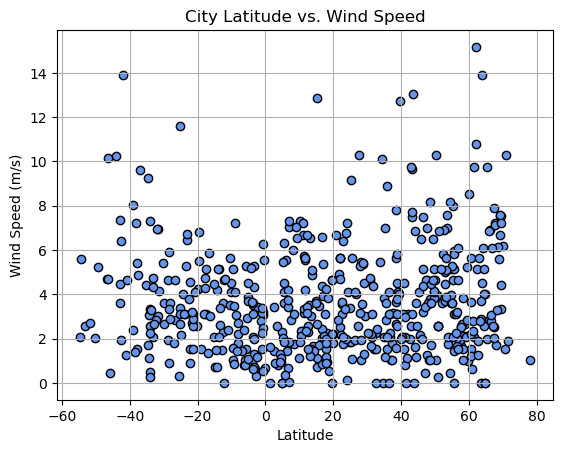

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label):
    # Compute the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Compute the regression line
    regress_values = x * slope + intercept
    
    # Create a scatter plot of the data
    plt.scatter(x, y, color = "cornflowerblue", edgecolor = "black")
    
    # Plot the regression line
    plt.plot(x, regress_values, "r-")
    
    # Annotate the plot with the equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x), min(y)), fontsize=15, color="red")
    
    # Add axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,274.05,95,66,3.33,RU,1684907253
3,praia da vitoria,38.7333,-27.0667,290.29,82,40,4.53,PT,1684907256
5,acapulco de juarez,16.8634,-99.8901,301.04,73,19,2.01,MX,1684907257
7,nishinoomote,30.7333,131.0000,295.46,46,20,4.63,JP,1684907258
12,hamilton,39.1834,-84.5333,292.62,71,0,4.12,US,1684907260


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chonchi,-42.6128,-73.8092,281.71,85,87,6.41,CL,1684907254
2,port elizabeth,-33.9180,25.5701,287.21,69,0,0.51,ZA,1684907255
4,puerto ayora,-0.7393,-90.3518,297.90,95,100,3.07,EC,1684907256
6,waitangi,-43.9535,-176.5597,285.03,63,79,10.24,NZ,1684907257
8,darwin,-12.4611,130.8418,304.14,40,0,3.60,AU,1684907121


###  Temperature vs. Latitude Linear Regression Plot

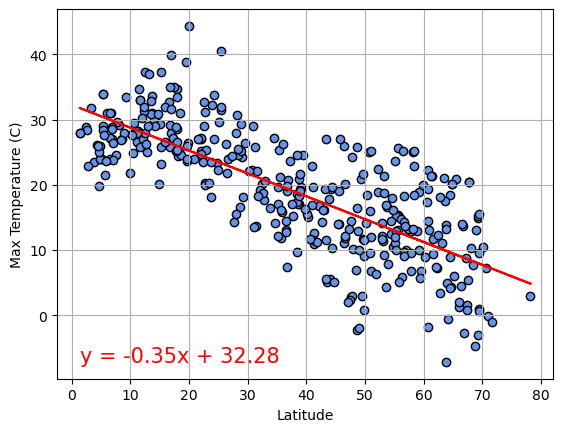

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp'] - 273.15
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)


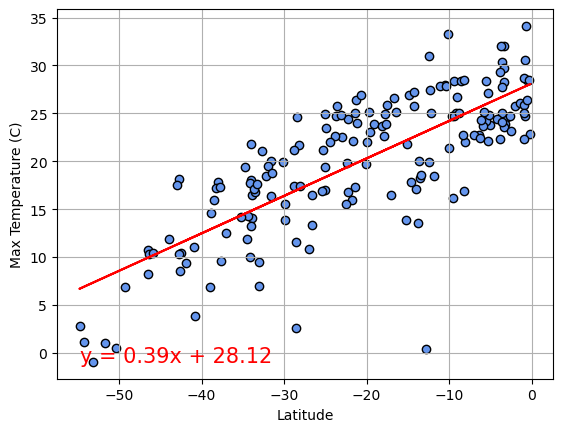

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp'] - 273.15
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** Temperature and distance from the equator are strongly related. The closer you are to the equator, the higher the temperature is likely to be.

### Humidity vs. Latitude Linear Regression Plot

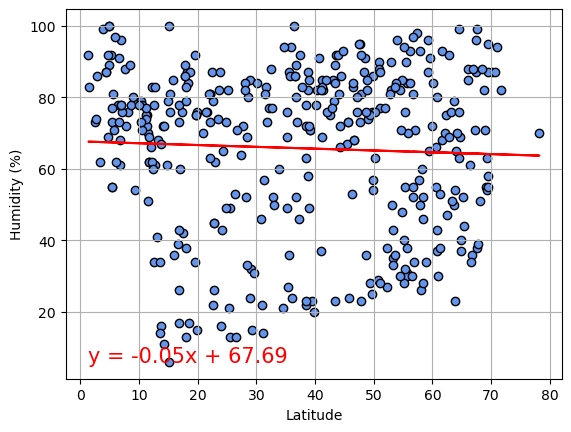

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

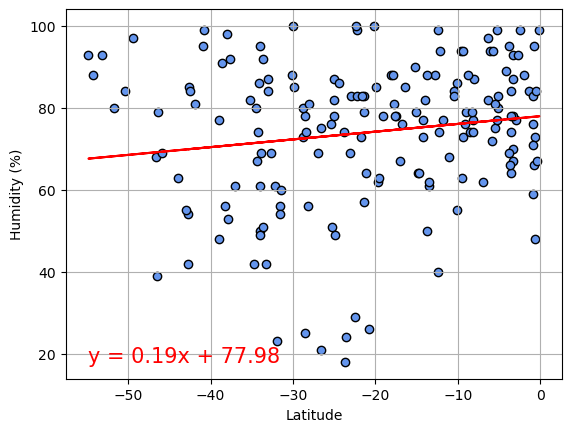

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** When the data was collected, there was a weak relationship between humidity and distance from the equator. In the Southern Hemisphere, the relationship was almost moderate. This is surprising because we usually think that humidity is higher at the equator.

### Cloudiness vs. Latitude Linear Regression Plot

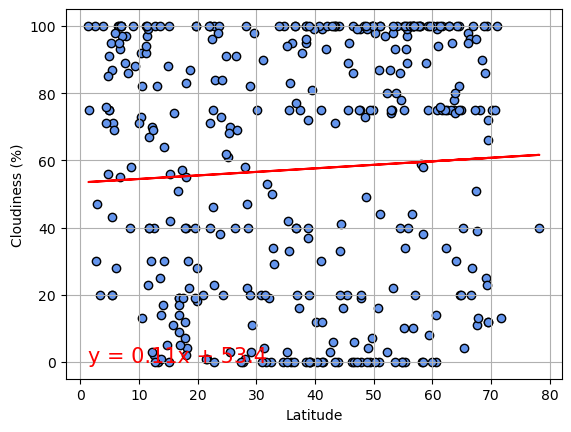

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

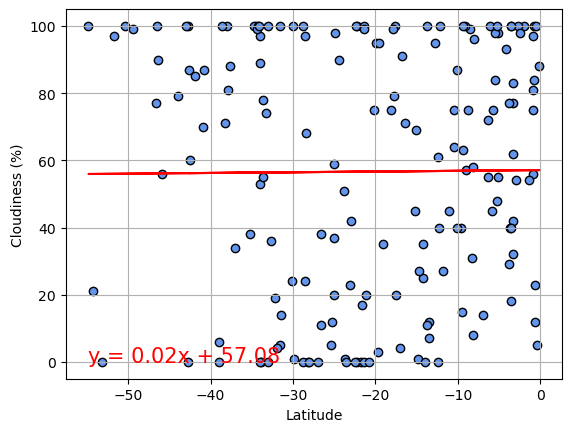

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** When the data was collected, there was almost no relationship between cloudiness and distance from the equator. There was a slight relationship in the Northern Hemisphere, but it was weak. So, cloudiness doesn’t seem to depend on how far you are from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

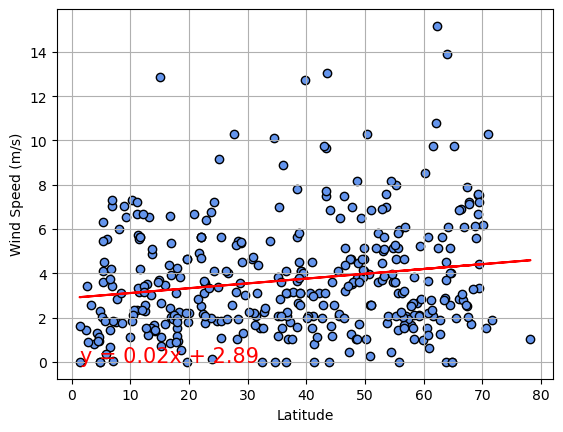

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

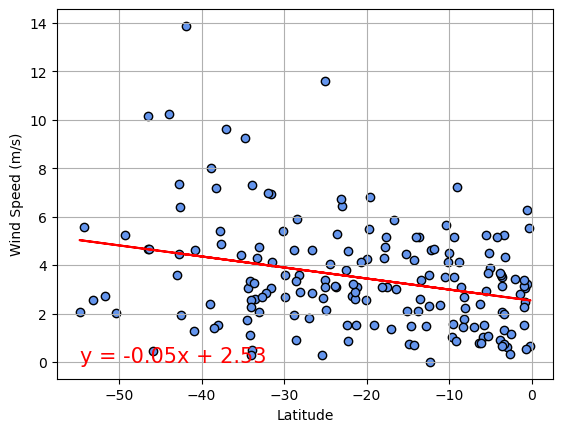

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** Wind speed and distance from the equator are slightly related. The further you go from the equator, the higher the wind speed. But this relationship is weak and may change with time.